In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Leer Datos

In [2]:
df = pd.read_csv('../data/data_titanic.csv', header='infer')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Procesamiento de los valores perdidos (nulos)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Un posible tratamiento de los datos faltantes de la columna 'Age' es reemplazarlos por los valores que vamos a designar nosotros.
Edad = []
for i in range(df.shape[0]): # Recorre las filas
    if np.isnan(df['Age'][i]): # Cojo la columna 'Age' y compruebo si es NaN
        if('Mr' in df['Name'][i]) or ('Mrs' in df['Name'][i]): # Si en la columna 'Name' contiene 'Mr' o 'Mrs'
            Edad.append(30) # Asigno 30 años
        else:
            Edad.append(10) # Si no, asigno 10 años
    else:
        Edad.append(df['Age'][i]) # Si no es NaN, mantengo el valor original

df['Age'] = Edad

In [7]:
df = df.drop(columns=['Cabin', 'Ticket', 'Name','Fare','PassengerId'], axis=1)  # Elimino las columnas que no voy a usar
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
df = df.dropna(axis=0)  # Elimino las filas con valores nulos
df.shape

(889, 7)

## Estudio de supervivencia

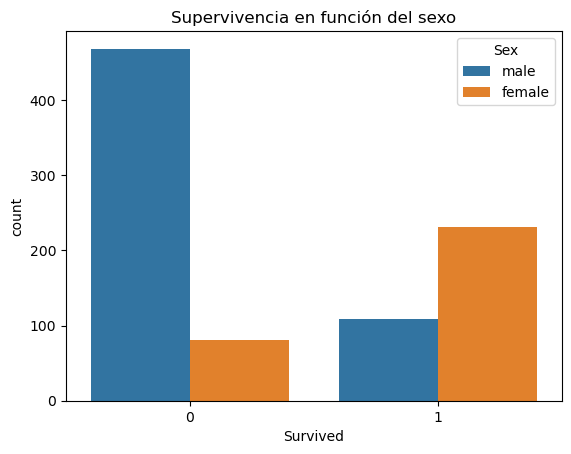

In [9]:
# Grafico de barras para ver la supervivencia en función del sexo
sns.countplot(x='Survived',data=df,hue='Sex')
plt.title('Supervivencia en función del sexo')
plt.show()

C:\Users\Fran\AppData\Local\Temp\ipykernel_27820\2952497323.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EdadCategoria', y='Survived', data=df, ci=None)


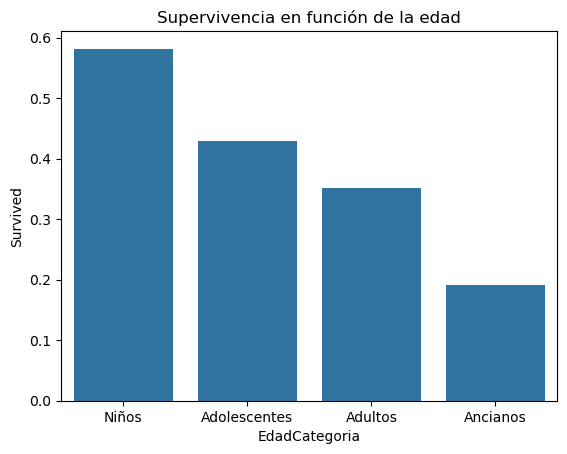

In [12]:
# Gráfico de superviviencia por conjuntos de edades
df["EdadCategoria"] = pd.cut(df["Age"], bins=[0, 12, 18, 60, 100], labels=["Niños", "Adolescentes", "Adultos", "Ancianos"])
sns.barplot(x='EdadCategoria', y='Survived', data=df, ci=None)
plt.title('Supervivencia en función de la edad')
plt.show()

C:\Users\Fran\AppData\Local\Temp\ipykernel_27820\1346718380.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EdadCategoria', y='Survived', data=df, ci=None)


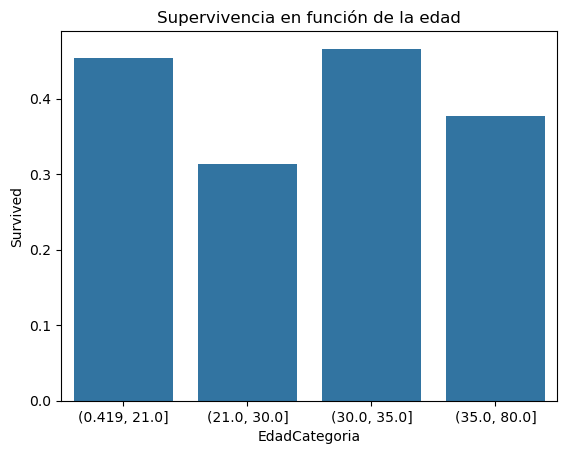

In [13]:
# Gráfico de superviviencia por conjuntos de edades
df["EdadCategoria"] = pd.qcut(df["Age"], q=4)
sns.barplot(x='EdadCategoria', y='Survived', data=df, ci=None)
plt.title('Supervivencia en función de la edad')
plt.show()

C:\Users\Fran\AppData\Local\Temp\ipykernel_27820\3543287472.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=df, ci=None)


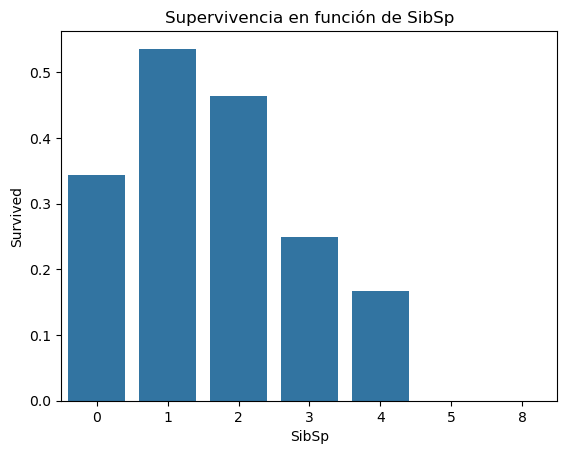

In [14]:
# Gráfico de supervivencia por SibSp
sns.barplot(x='SibSp', y='Survived', data=df, ci=None)
plt.title('Supervivencia en función de SibSp')
plt.show()

## Ingeniería de características

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,EdadCategoria
0,0,3,male,22.0,1,0,S,"(21.0, 30.0]"
1,1,1,female,38.0,1,0,C,"(35.0, 80.0]"
2,1,3,female,26.0,0,0,S,"(21.0, 30.0]"
3,1,1,female,35.0,1,0,S,"(30.0, 35.0]"
4,0,3,male,35.0,0,0,S,"(30.0, 35.0]"


In [17]:
df = pd.get_dummies(df.EdadCategoria, drop_first=True, prefix='Edad').join(df.drop(columns=['EdadCategoria','Age'], axis=1)) # One-hot encoding de la columna 'EdadCategoria' y la uno al DataFrame original
df.head()

,"Edad_(21.0, 30.0]","Edad_(30.0, 35.0]","Edad_(35.0, 80.0]",Survived,Pclass,Sex,SibSp,Parch,Embarked
0,True,False,False,0,3,male,1,0,S
1,False,False,True,1,1,female,1,0,C
2,True,False,False,1,3,female,0,0,S
3,False,True,False,1,1,female,1,0,S
4,False,True,False,0,3,male,0,0,S


In [18]:
# Utilización de get_dummies para las columnas categóricas, con los campos Sex, SibSp, Parch, Embarked
df = pd.get_dummies(df.Sex, drop_first=True, prefix='Sex').join(df.drop(columns=['Sex'], axis=1))
df = pd.get_dummies(df.Embarked, drop_first=True, prefix='Embarked').join(df.drop(columns=['Embarked'], axis=1))
df = pd.get_dummies(df.SibSp, drop_first=True, prefix='SibSp').join(df.drop(columns=['SibSp'], axis=1))
df = pd.get_dummies(df.Parch, drop_first=True, prefix='Parch').join(df.drop(columns=['Parch'], axis=1))
df.head()


,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Sex_male,"Edad_(21.0, 30.0]","Edad_(30.0, 35.0]","Edad_(35.0, 80.0]",Survived,Pclass
0,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,0,3
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,1,1
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,1,3
3,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,1,1
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,0,3


In [19]:
df = pd.get_dummies(df.Pclass, drop_first=True, prefix='Pclass').join(df.drop(columns=['Pclass'], axis=1))
df.head()

,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,...,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Sex_male,"Edad_(21.0, 30.0]","Edad_(30.0, 35.0]","Edad_(35.0, 80.0]",Survived
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,False,False,0
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,1
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,1
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,0


In [20]:
df.to_csv('../data/data_titanic_procesado.csv', index=False)

## KNN entrenamiento y test

In [21]:
X = df.drop('Survived', axis=1)  # Variables independientes
y = df['Survived']               # Variable dependiente

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 78.08988764044943


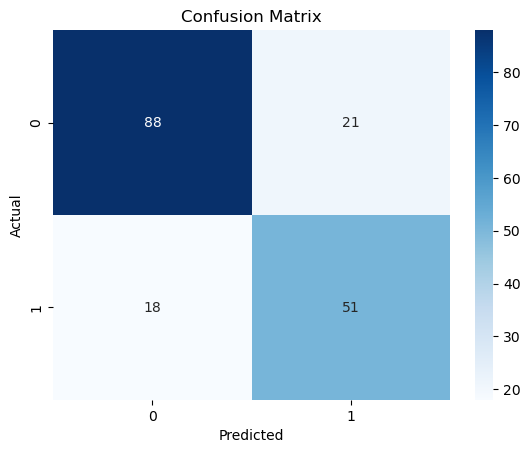

In [24]:
# Creamos modelo KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) # Entrenamiento del modelo
y_pred = knn.predict(X_test) # Predicción
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100) # Precisión del modelo
# Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## KNN con hiperparámetro k

In [25]:
precisiones = []
k_range = range(1, 101) # Probamos valores de k desde 1 hasta 100
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precisiones.append(metrics.accuracy_score(y_test, y_pred))

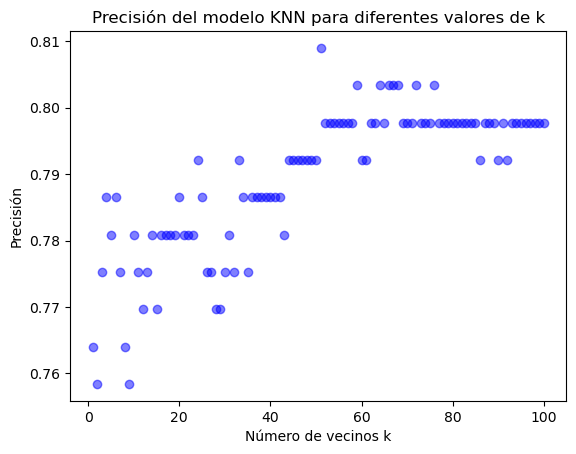

In [26]:
# Ver los valores de k y sus precisiones
plt.scatter(k_range, precisiones, color='blue', marker='o', alpha=0.5)
plt.xlabel('Número de vecinos k')
plt.ylabel('Precisión')
plt.title('Precisión del modelo KNN para diferentes valores de k')
plt.show()

In [ ]:
k_grid = range(1,51) # Probamos valores de k desde 1 hasta 50
parametros = {'n_neighbors': k_grid} # Hiperparámetros a probar
grid_knn = GridSearchCV(KNeighborsClassifier(), parametros, cv=5, n_jobs=-1) # Configuración de la búsqueda en cuadrícula
grid_knn.fit(X_train, y_train) # Entrenamiento con búsqueda en cuadrícula
print("Mejor valor de k:", grid_knn.best_params_)
print("Mejor precisión:", grid_knn.best_score_*100)

Mejor valor de k: {'n_neighbors': 25}
Mejor precisión: 81.2922288978627


Accuracy con k óptimo: 78.65168539325843
Matriz de confusión con k óptimo:


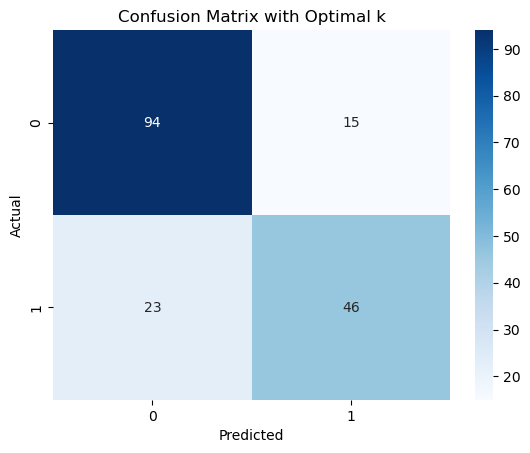

In [28]:
best_k = grid_knn.best_params_['n_neighbors']
knn_optimo = KNeighborsClassifier(n_neighbors=best_k)
knn_optimo.fit(X_train, y_train)
y_pred_optimo = knn_optimo.predict(X_test)
print("Accuracy con k óptimo:", metrics.accuracy_score(y_test, y_pred_optimo)*100)
print("Matriz de confusión con k óptimo:")
confusion_matrix_optimo = metrics.confusion_matrix(y_test, y_pred_optimo)
sns.heatmap(confusion_matrix_optimo, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Optimal k')
plt.show()